### Created on 2023
### @author: S.W

# 1. 학습에 필요한 라이브러리 불러오기

In [3]:
import PIL
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from keras.utils import np_utils

# 2.  MNIST 데이터 불러오기

### tensorflow에서 가져올 수 있는 데이터셋 목록
https://www.tensorflow.org/datasets/catalog/overview

In [2]:
# tensorflow에 내장되어 있는 mninst dataset 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [3]:
train_images[0].shape

(28, 28)

In [4]:
im = PIL.Image.fromarray(train_images[0])
im.show()

AxesImage(80,52.8;496x369.6)
숫자:  7


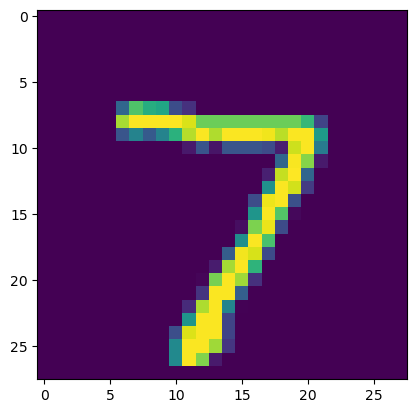

In [5]:
n = 0
print(plt.imshow(test_images[n]))
print("숫자: ",test_labels[n])

# 3. 데이터 전처리

In [6]:
# CNN 학습을 위해 데이터 구조 변경
# CNN의 일반적인 데이터 input 구조 - (데이터 수, 높이, 너비, 채널)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

# 4. CNN 모델 구성

CNN의 일반적인 데이터 input 구조 - (batch_size, height, width, depth)

In [7]:
# keras sequentail API

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten()) # 고차원 데이터를 1차원 데이터로 flatten 시킴
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
# Import the libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense

# keras functional API

input_layer = Input(shape = (28, 28, 1))

cnn_1 = layers.Conv2D(32, (3,3), activation="relu")(input_layer)
pooling_1 = layers.MaxPooling2D((2,2))(cnn_1)
cnn_2 = layers.Conv2D(64, (3,3), activation="relu")(pooling_1)
pooling_2 = layers.MaxPooling2D((2,2))(cnn_2)
cnn_3 = layers.Conv2D(64, (3,3), activation="relu")(pooling_2)

flat = layers.Flatten()(cnn_3) # 고차원 데이터를 1차원 데이터로 flatten 시킴
dense_1 = layers.Dense(64, activation='relu')(flat)
output_layer= Dense(10, activation="softmax")(dense_1)

model = Model(inputs=input_layer, outputs=output_layer)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928 

* CNN의 학습 파라미터 계산법 - 이전채널 수 x 필터 파라미터의 총 개수 x 현재채널 수 + 현재채널 수

In [11]:
# model의 학습 

# model.compile() - 학습할 때 필요한 요인들을 설정한다.
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'sparse_categorical_crossentropy'])

# model.fit() - 모델을 학습시킨다.
# 모델 학습
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size = 64,
                    epochs=5)

# 학습 관련 함수가 있는 keras 공식 documents - https://keras.io/api/models/model_training_apis/

Epoch 1/5
  1/938 [..............................] - ETA: 2:54 - loss: 2.2976 - accuracy: 0.1562 - sparse_categorical_crossentropy: 2.2976

2023-04-21 14:01:33.573102: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


938/938 [==============================] - 9s 10ms/step - loss: 0.1854 - accuracy: 0.9431 - sparse_categorical_crossentropy: 0.1854 - val_loss: 0.0547 - val_accuracy: 0.9830 - val_sparse_categorical_crossentropy: 0.0547
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0537 - accuracy: 0.9836 - sparse_categorical_crossentropy: 0.0537 - val_loss: 0.0414 - val_accuracy: 0.9857 - val_sparse_categorical_crossentropy: 0.0414
Epoch 3/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0368 - accuracy: 0.9883 - sparse_categorical_crossentropy: 0.0368 - val_loss: 0.0285 - val_accuracy: 0.9902 - val_sparse_categorical_crossentropy: 0.0285
Epoch 4/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0290 - accuracy: 0.9909 - sparse_categorical_crossentropy: 0.0290 - val_loss: 0.0288 - val_accuracy: 0.9910 - val_sparse_categorical_crossentropy: 0.0288
Epoch 5/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0233 - accu

# 5. 모델 평가

In [12]:
# evaluate() : model.compile() 함수에서 사용한 metrics의 함수를 통해 test data에 대한 metric 결과 출력

model.evaluate(test_images,  test_labels, verbose=0)

[0.031051525846123695, 0.9897000193595886, 0.031051525846123695]

In [13]:
# history를 통해 확인할 수 있는 값 출력하기
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'sparse_categorical_crossentropy', 'val_loss', 'val_accuracy', 'val_sparse_categorical_crossentropy'])


313/313 [==============================] - 1s 4ms/step - loss: 0.0311 - accuracy: 0.9897 - sparse_categorical_crossentropy: 0.0311

Accuracy: 0.9897


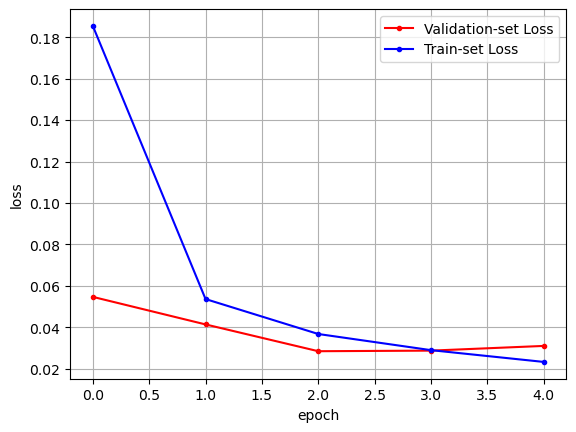

In [14]:
# 출처
# https://snowdeer.github.io/machine-learning/2018/01/10/check-relation-between-epoch-and-loss-using-graph/

print('\nAccuracy: {:.4f}'.format(model.evaluate(test_images, test_labels)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
# 모델 테스트 데이터 예측값 출력
y_pred = model.predict(test_images)
y_pred[0]

array([1.3231976e-07, 1.6739143e-08, 1.6302404e-07, 1.0790100e-07,
       7.9858404e-09, 1.9668673e-09, 1.6682145e-09, 9.9999964e-01,
       7.0441728e-09, 1.7675607e-08], dtype=float32)

In [16]:
# 열 단위, 가장 높은 값을 반환
np.argmax(y_pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, np.argmax(y_pred, axis=1))

0.9897

In [18]:
test_labels , y_pred

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 array([[1.32319755e-07, 1.67391434e-08, 1.63024040e-07, ...,
         9.99999642e-01, 7.04417280e-09, 1.76756068e-08],
        [3.06614384e-05, 1.93711026e-06, 9.99963641e-01, ...,
         1.23549908e-08, 5.25619214e-07, 1.16274559e-10],
        [3.22504929e-05, 9.98081088e-01, 1.42697695e-06, ...,
         1.43657613e-04, 1.04518770e-03, 2.42104761e-05],
        ...,
        [9.37672181e-14, 3.33322259e-11, 2.46325399e-12, ...,
         9.85728277e-10, 1.04782885e-08, 3.42438328e-10],
        [1.00678285e-07, 4.86264196e-10, 1.37481285e-11, ...,
         1.95388949e-09, 1.49079715e-04, 1.40709773e-07],
        [1.31909997e-04, 1.88551823e-08, 4.35255814e-08, ...,
         2.01416540e-11, 1.22355386e-05, 4.49186066e-09]], dtype=float32))